# Project Summary

In [1]:
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np


from game import Game, Player
from utils import investigate_game
from utils.investigate_game import InvestigateGame
from players.random_player import RandomPlayer
from players.min_max import MinMaxPlayer, AlphaBetaMinMaxPlayer
from players.monte_carlo_rl import MonteCarloRLPlayer
from players.monte_carlo_tree_search import MCTSPlayer

import sys

# needed to load Seralized Monte Carlo RL Player
sys.modules['investigate_game'] = investigate_game

In [2]:
def plot_training_stats(rewards: list, step_size: int, switch_ratio: int | None = None) -> None:
    """
    Given a training list of rewards, this function plots the averages of the rewards
    using a given step size.

    Args:
        rewards: the rewards achieved during training time;
        step: the step size to be used to plot an average value;
        switch_ratio: define the moment in which minmax started playing-

    Returns:
        None.
    """

    # https://stackoverflow.com/questions/15956309/averaging-over-every-n-elements-of-a-numpy-array
    # compute the averages
    averages = np.mean(np.array(rewards).reshape(-1, step_size), axis=1)

    # define the width and height of the figure in inches
    plt.figure(figsize=(10, 5))
    # plot the averages
    plt.plot(averages, color='red', marker='o', linestyle='dashed', label='Training')
    # if minmax played
    if switch_ratio is not None:
        # compute the exact moment
        switch_moment = int(len(rewards) / step_size * switch_ratio)
        # print a vertical line at the moment minmax started playing
        plt.axvline(x=switch_moment, color='green', label='MinMax Starts Playing')
    # specify the title
    plt.title('Training Summary')
    # specify the x-axis label
    plt.xlabel('# of the step')
    # specify the y-axis label
    plt.ylabel('Mean rewards value')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

## Monte Carlo Reinforcement learning player

### Show the training

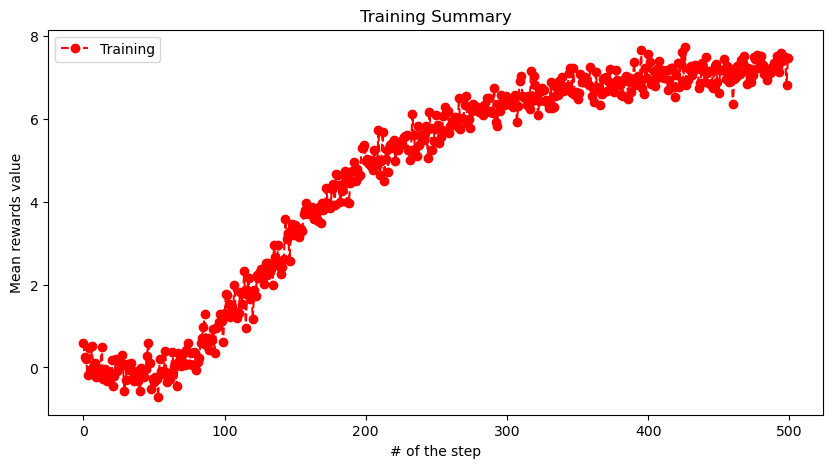

In [3]:
monte_carlo_rl_player = MonteCarloRLPlayer()
monte_carlo_rl_player.load('trained_agents/monte_carlo_rl.pkl')
plot_training_stats(monte_carlo_rl_player.rewards, step_size=1_000)

## Train MinMax

In [ ]:
minmax_player_0 = MinMaxPlayer(0, depth=3, symmetries=True)
rand_player = RandomPlayer()
pbar = tqdm(range(10))
for i in pbar:
    g = Game()
    _ = g.play(minmax_player_0, rand_player)
    pbar.set_description(
        f'Hash tables entries: {(len(minmax_player_0._visited_max_states) + len(minmax_player_0._visited_min_states)):,}'
    )
print(
    f'Entry in the Hash tables minmax_player_0: {(len(minmax_player_0._visited_max_states) + len(minmax_player_0._visited_min_states)):,}'
)
minmax_player_0.save('agents/minmax_player0_depth3_agent1')

In [ ]:
minmax_player_1 = MinMaxPlayer(1, depth=3, symmetries=True)
rand_player = RandomPlayer()
pbar = tqdm(range(10))
for i in pbar:
    g = Game()
    _ = g.play(rand_player, minmax_player_1)
    pbar.set_description(
        f'Hash tables entries: {(len(minmax_player_1._visited_max_states) + len(minmax_player_1._visited_min_states)):,}'
    )
print(
    f'Entry in the Hash tables minmax_player_1: {(len(minmax_player_1._visited_max_states) + len(minmax_player_1._visited_min_states)):,}'
)
minmax_player_1.save('agents/minmax_player1_depth3_agent1')

## Train AlphaBetaMinMax

In [ ]:
alphabeta_player_0 = MinMaxPlayer(0, depth=3, symmetries=True)
rand_player = RandomPlayer()
pbar = tqdm(range(10))
for i in pbar:
    g = Game()
    _ = g.play(alphabeta_player_0, rand_player)
    pbar.set_description(
        f'Hash tables entries: {(len(alphabeta_player_0._visited_max_states) + len(alphabeta_player_0._visited_min_states)):,}'
    )
print(
    f'Entry in the Hash tables alphabeta_player_0: {(len(alphabeta_player_0._visited_max_states) + len(alphabeta_player_0._visited_min_states)):,}'
)
alphabeta_player_0.save('agents/alphabeta_player0_depth3_agent1')

In [ ]:
alphabeta_player_1 = MinMaxPlayer(1, depth=3, symmetries=True)
rand_player = RandomPlayer()
pbar = tqdm(range(10))
for i in pbar:
    g = Game()
    _ = g.play(rand_player, alphabeta_player_1)
    pbar.set_description(
        f'Hash tables entries: {(len(alphabeta_player_1._visited_max_states) + len(alphabeta_player_1._visited_min_states)):,}'
    )
print(
    f'Entry in the Hash tables alphabeta_player_1: {(len(alphabeta_player_1._visited_max_states) + len(alphabeta_player_1._visited_min_states)):,}'
)
alphabeta_player_1.save('agents/alphabeta_player1_depth3_agent1')

## View Games

In [4]:
# create the first player
player1 = monte_carlo_rl_player
# create the second player
player2 = RandomPlayer()
# create a new game
game = InvestigateGame(Game())
# LET'S BATTLE
winner = game.play(player1, player2, max_steps_draw=10)

-- BEGINNING OF THE GAME --
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
Player ❌ chose to move (0, 1) to the top
❌⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
Player ⭕️ chose to move (2, 4) to the right
❌⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⭕️
Player ❌ chose to move (0, 1) to the bottom
❌⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
❌⬜️⬜️⬜️⭕️
Player ⭕️ chose to move (0, 1) to the top
⭕️⬜️⬜️⬜️⬜️
❌⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
❌⬜️⬜️⬜️⭕️
Player ❌ chose to move (4, 0) to the left
❌⭕️⬜️⬜️⬜️
❌⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
❌⬜️⬜️⬜️⭕️
Player ⭕️ chose to move (3, 0) to the right
❌⭕️⬜️⬜️⭕️
❌⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
❌⬜️⬜️⬜️⭕️
Player ❌ chose to move (0, 2) to the top
❌⭕️⬜️⬜️⭕️
❌⬜️⬜️⬜️⬜️
❌⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️
❌⬜️⬜️⬜️⭕️
Player ⭕️ chose to move (0, 3) to the bottom
❌⭕️⬜️⬜️⭕️
❌⬜️⬜️⬜️⬜️
❌⬜️⬜️⬜️⬜️
❌⬜️⬜️⬜️⬜️
⭕️⬜️⬜️⬜️⭕️
Player ❌ chose to move (2, 4) to the left
❌⭕️⬜️⬜️⭕️
❌⬜️⬜️⬜️⬜️
❌⬜️⬜️⬜️⬜️
❌⬜️⬜️⬜️⬜️
❌⭕️⬜️⬜️⭕️
Winner: Player 0
-- END OF THE GAME --


## Testing Players performance

In [5]:
def show_game_statistics(player1: Player, player2: Player, n_games: int) -> None:
    """
    Play a few games between two players and plot the calculated winning percentages.

    Args:
        players1: the first player;
        players2: the second player;
        n_games: how many games to play.

    Returns:
        None.
    """

    # define the width and height of the figure in inches
    plt.figure(figsize=(8, 5))

    # let the players play both first and second
    for plot, (player1, player2) in enumerate([(player1, player2), (player2, player1)]):
        # count how many wins for the first player
        player1_wins = 0

        # for each game
        for _ in range(n_games):
            # create the game
            game = Game()
            # play the game
            winner = game.play(player1, player2)
            # if the first player wins
            if winner == 0:
                # increment the counter
                player1_wins += 1

        # create a subplot
        plt.subplot(1, 2, plot + 1)
        # plot the first player wins
        bars = plt.bar([0, 0.6], [player1_wins, n_games - player1_wins], color=['royalblue', 'lightcoral'], width=0.4)
        # for each bar
        for bar in bars:
            # get the winning percentage
            percentage = bar.get_height() / n_games
            # write the percentage on top of the bar
            plt.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_height(),
                f'{percentage:.2%}',
                ha='center',
                va='bottom',
                fontsize='medium',
            )
        # plot the players' names
        plt.xticks([0, 0.6], [player1.__class__.__name__, player2.__class__.__name__])
        # delete y-axis ticks and labels
        plt.tick_params(left=False, labelleft=False)
        # specify the y-axis label
        plt.ylabel('Wins')
        # specify the title shared between the subplots
        plt.title(
            f'{player1.__class__.__name__.replace("Player","")} VS {player2.__class__.__name__.replace("Player","")}',
            fontsize=10,
        )

    # specify the title shared between the subplots
    plt.suptitle(f'Summary of {n_games} games')

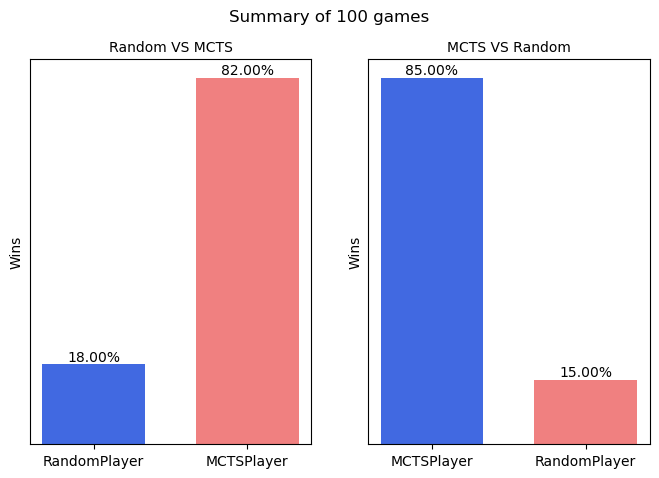

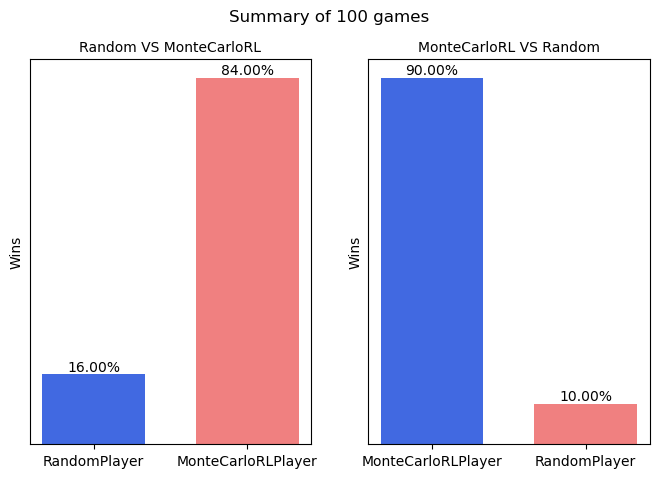

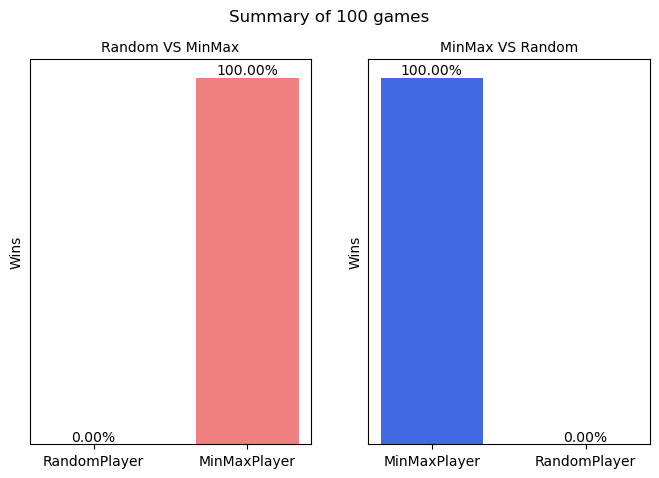

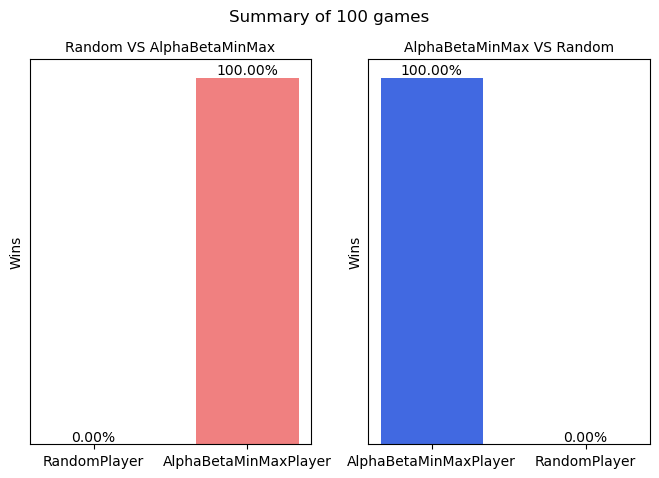

In [6]:
show_game_statistics(RandomPlayer(), MCTSPlayer(n_simulations=100, random=True), 100)
show_game_statistics(RandomPlayer(), monte_carlo_rl_player, 100)
show_game_statistics(RandomPlayer(), MinMaxPlayer(depth=2), 100)
show_game_statistics(RandomPlayer(), AlphaBetaMinMaxPlayer(depth=2), 100)